# VGG 16

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 992 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 291 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

In [7]:
es = EarlyStopping(monitor = 'accuracy', patience = 10)
mc = ModelCheckpoint('vggmodel.h5', monitor = 'accuracy', verbose=1, save_best_only = True)

In [8]:
epochs = 10
batch_size = 32

In [9]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=[es, mc]) 

Epoch 1/10
31/31 [==============================] - 1007s 32s/step - loss: 0.6943 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 2/10
31/31 [==============================] - 994s 32s/step - loss: 0.6933 - acc: 0.5030 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 3/10
31/31 [==============================] - 1009s 33s/step - loss: 0.6933 - acc: 0.5030 - val_loss: 0.6930 - val_acc: 0.5078
Epoch 4/10
31/31 [==============================] - 1017s 33s/step - loss: 0.6932 - acc: 0.4748 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 5/10
31/31 [==============================] - 986s 32s/step - loss: 0.6933 - acc: 0.4708 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 6/10
31/31 [==============================] - 984s 32s/step - loss: 0.6933 - acc: 0.4708 - val_loss: 0.6931 - val_acc: 0.5078
Epoch 7/10
31/31 [==============================] - 1001s 32s/step - loss: 0.6932 - acc: 0.5030 - val_loss: 0.6930 - val_acc: 0.5078
Epoch 8/10
31/31 [==============================] - 1005s 32s/step - los

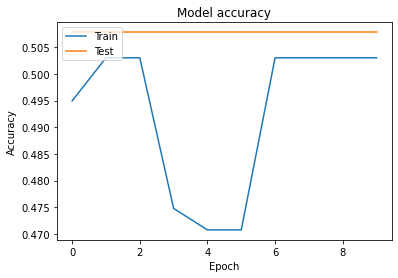

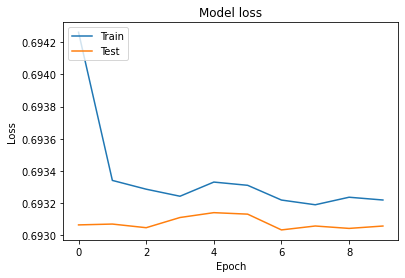

In [10]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()